In [323]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib notebook
%matplotlib inline

#**KNN**

In [324]:
df = pd.read_csv('ParisHousingClass99.88.csv')
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [325]:
df.shape

(10000, 18)

In [326]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [327]:
#Returns the names of all of the attributes in the dataset
df.keys()

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [328]:
#This transforms the category data from "basic" and "luxury" to 0 and 1 values as a resulting array
le = LabelEncoder()
label = le.fit_transform(df['category'])
#The resulting array from LabelEncoder is then filled in for the category data
df.drop("category", axis=1, inplace=True)
#Basic = 0, Luxury = 1

In [329]:
#Scaling the data using MinMaxScaler (Can also use standard scaler)
scaler = MinMaxScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [330]:
##Test train split

In [331]:
x = scaled_data
y = label

In [332]:
#Using train_test_split function to split the train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 55)

In [333]:
x_train.shape

(8000, 17)

In [334]:
x_test.shape

(2000, 17)

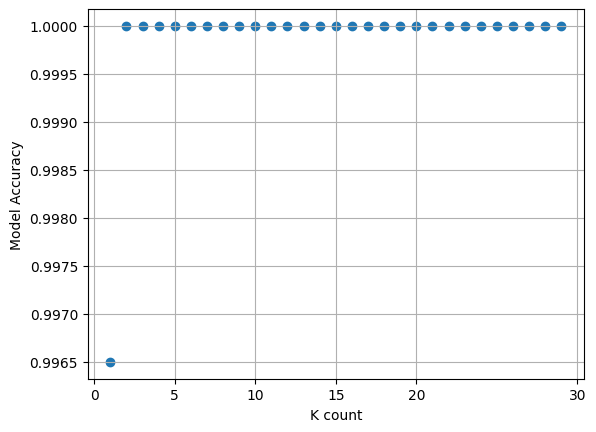

In [335]:
#Function to determine which k value provides the most accurate result
k_vals = range(1, 30)
results = []

for k in k_vals:
  #Performs K-NN calculation
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  #Adds the accuracy to the results array
  results.append(knn.score(x_test, y_test))

#Plots the results array based on the K-value
plt.figure()
plt.xlabel("K count")
plt.ylabel("Model Accuracy")
plt.scatter(k_vals, results)
plt.grid()
plt.xticks([0, 5, 10, 15, 20, 30])
plt.show()

In [336]:
knn = KNeighborsClassifier(n_neighbors=2)

In [337]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [338]:
knn.score(x_test, y_test)

1.0

In [339]:
prediction = knn.predict(x_test)

In [340]:
cm = confusion_matrix(y_test, prediction)

In [341]:
cm

array([[1515,    0],
       [   0,  485]])

# **PCA Calculation w/ KNN**

In [342]:
#Using the scaled data, the PCA function will reduce the dimensions from 18 to 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [343]:
scaled_data.shape

(10000, 17)

In [344]:
x_pca.shape

(10000, 2)

Text(0, 0.5, 'second principle component')

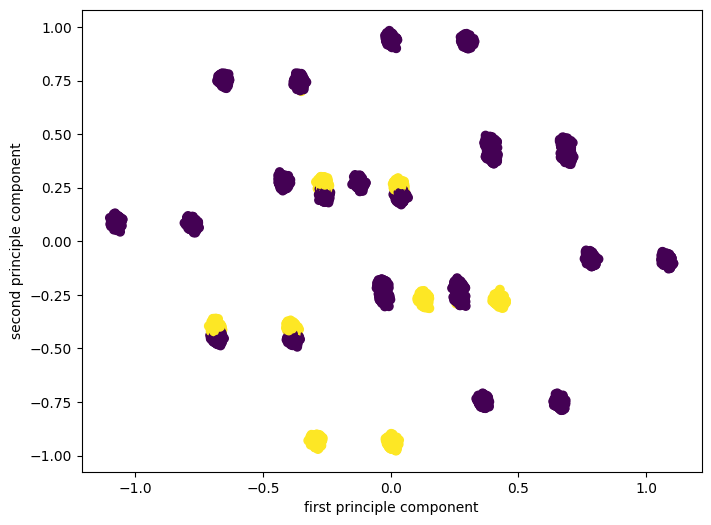

In [345]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=label)
plt.xlabel('first principle component')
plt.ylabel('second principle component')

In [346]:
#Performing Knn with the x_pca data
x = x_pca
y = label

In [347]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 55)

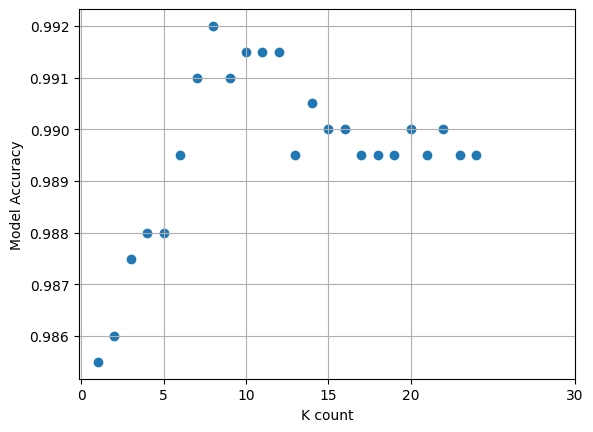

In [348]:
#Function to determine which k value provides the most accurate result
k_vals = range(1, 25)
results = []

for k in k_vals:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  results.append(knn.score(x_test, y_test))

plt.figure()
plt.xlabel("K count")
plt.ylabel("Model Accuracy")
plt.scatter(k_vals, results)
plt.grid()
plt.xticks([0, 5, 10, 15, 20, 30])
plt.show()

In [360]:
knn = KNeighborsClassifier(n_neighbors=7)

In [361]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [362]:
knn.score(x_test, y_test)

0.991

In [352]:
prediction = knn.predict(x_test)

In [363]:
cm = confusion_matrix(y_test, prediction)
cm

array([[1511,    4],
       [  13,  472]])